In [57]:
import matplotlib.pyplot as plt
import pyart
import warnings
import numpy as np
warnings.filterwarnings('ignore')
RADAR_NAME_None = 'PHA210510232004.RAWC6PA'
RADAR_NAME_Full='PHA210505201004.RAWC0KS'
# read in the data
radar = pyart.io.read_sigmet(RADAR_NAME_Full)

In [58]:
#gatefilter = pyart.filters.GateFilter(radar)
#gatefilter.exclude_below('reflectivity', 0)

In [59]:
radar=radar.extract_sweeps([0])

In [60]:
a=radar.fields['reflectivity']['data'][:,-5:]

Tìm mode của a (Zf)

In [61]:
from scipy import stats
from scipy.stats import mstats

In [62]:
Zf=mstats.mode(a,axis=None)[0][0]

Tìm Zs

In [63]:
range_bins=radar.range['data']

In [64]:
Zs=pyart.retrieve.compute_noisedBZ(360, noisedBZ_val=Zf, _range=range_bins, ref_dist=300., noise_field='noise_dbz')

In [65]:
Zsplus4=Zs['data']+4

In [66]:
import numpy.ma as ma
s=ma.masked_less(radar.fields['reflectivity']['data'],Zsplus4)
#s=radar.fields['reflectivity']['data']+6.54

In [67]:
radar.add_field_like('reflectivity', 'reflectivity_cor_noise',ma.masked_less_equal(s,0.),replace_existing=True)

In [68]:
#gatefilter = pyart.filters.GateFilter(radar)
#gatefilter.exclude_below('reflectivity', 10)

plot 

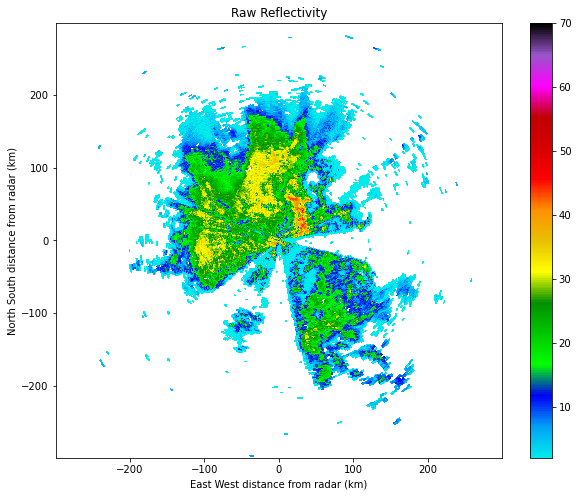

In [69]:
fig = plt.figure(figsize=(10, 8))
display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity',vmin=2,vmax=70,cmap=pyart.graph.cm.NWSRef,
             colorbar_label='', title='Raw Reflectivity')#gatefilter=gatefilter)

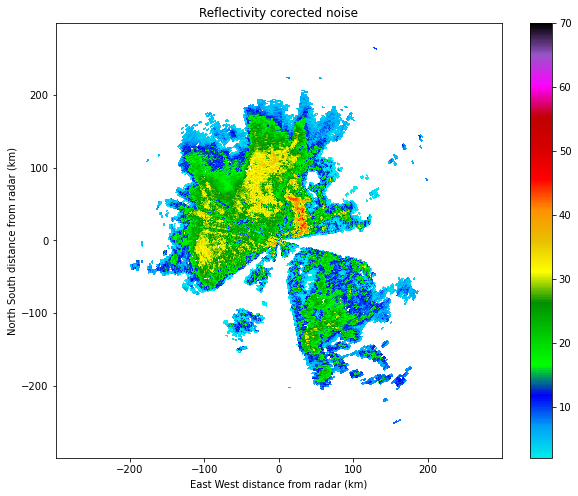

In [70]:
fig = plt.figure(figsize=(10, 8))
display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity_cor_noise',vmin=2,vmax=70,cmap=pyart.graph.cm.NWSRef,
             colorbar_label='', title='Reflectivity corected noise')